In [70]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import cv2

# Prepare data

In [50]:
BASE_PATH = "./images"

class_names = ['fork','knife','spoon']

IMAGE_WIDTH = 400
IMAGE_HEIGHT = 300

train_ds = tf.keras.utils.image_dataset_from_directory(
    BASE_PATH,
    labels = 'inferred',
    label_mode = "int",
    #color_mode = 'grayscale',
    image_size = (IMAGE_HEIGHT,IMAGE_WIDTH),
    shuffle=True,
    seed = 123,
    validation_split = 0.2,
    subset = "training",
)

print()

test_ds = tf.keras.utils.image_dataset_from_directory(
    BASE_PATH,
    labels = 'inferred',
    label_mode = "int",
    #color_mode = 'grayscale',
    image_size = (IMAGE_HEIGHT,IMAGE_WIDTH),
    shuffle=True,
    seed = 123,
    validation_split = 0.2,
    subset = "validation",
)



Found 3850 files belonging to 3 classes.
Using 3080 files for training.

Found 3850 files belonging to 3 classes.
Using 770 files for validation.


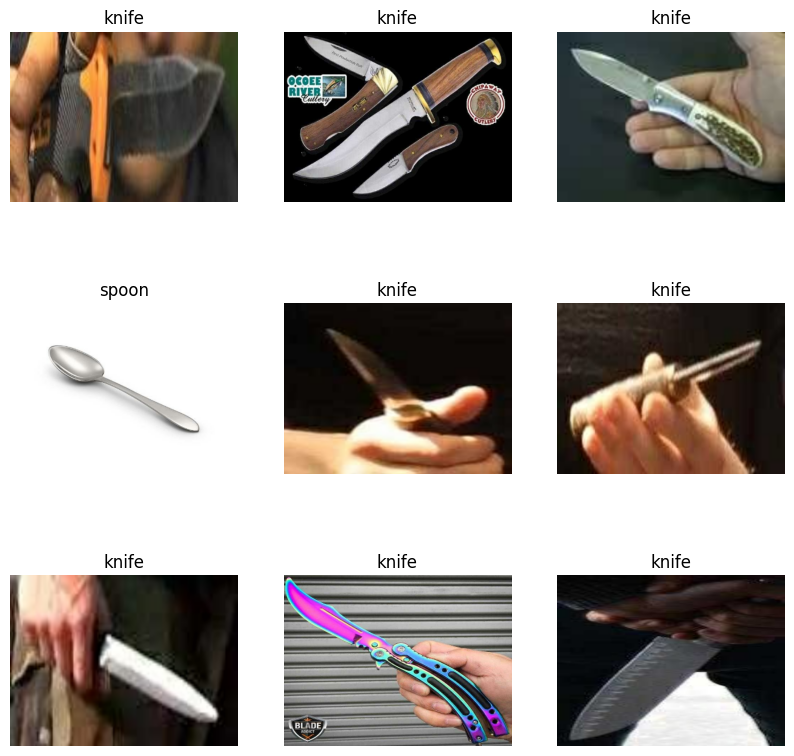

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"),cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [53]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Build model

In [55]:
NUMBER_OF_CLASSES = 3

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape = (IMAGE_HEIGHT,IMAGE_WIDTH,3)),
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((3,3)),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((3,3)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(NUMBER_OF_CLASSES, activation = tf.keras.activations.softmax)
])

#model.summary()

# Compile

In [56]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

# Train

In [57]:
history = model.fit(train_ds, validation_data = test_ds, epochs=5)

Epoch 1/5


e:\Anaconda3\envs\tensor_flow\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(




97/97 [==============================] - 70s 563ms/step - loss: 0.4782 - accuracy: 0.8977 - val_loss: 0.2677 - val_accuracy: 0.9143
Epoch 2/5
97/97 [==============================] - 37s 360ms/step - loss: 0.2490 - accuracy: 0.9153 - val_loss: 0.2421 - val_accuracy: 0.9130
Epoch 3/5
97/97 [==============================] - 30s 312ms/step - loss: 0.2071 - accuracy: 0.9179 - val_loss: 0.2388 - val_accuracy: 0.9169
Epoch 4/5
97/97 [==============================] - 29s 300ms/step - loss: 0.1625 - accuracy: 0.9341 - val_loss: 0.2611 - val_accuracy: 0.9299
Epoch 5/5
97/97 [==============================] - 29s 304ms/step - loss: 0.1328 - accuracy: 0.9516 - val_loss: 0.2758 - val_accuracy: 0.9390


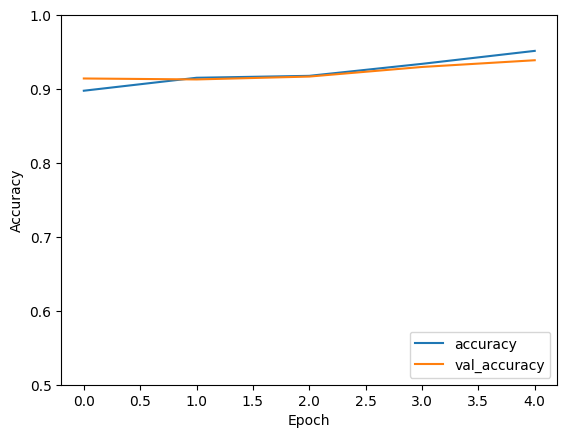

In [58]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate

In [61]:
test_loss , test_accuracy = model.evaluate(test_ds,verbose=2)

print(f'Model accuracy: {test_accuracy:.2f} Model loss: {test_loss:.2f}')

25/25 - 2s - loss: 0.2758 - accuracy: 0.9390 - 2s/epoch - 88ms/step
Model accuracy: 0.94 Model loss: 0.28


# Predict

 1/25 [>.............................] - ETA: 3s

25/25 [==============================] - 3s 102ms/step


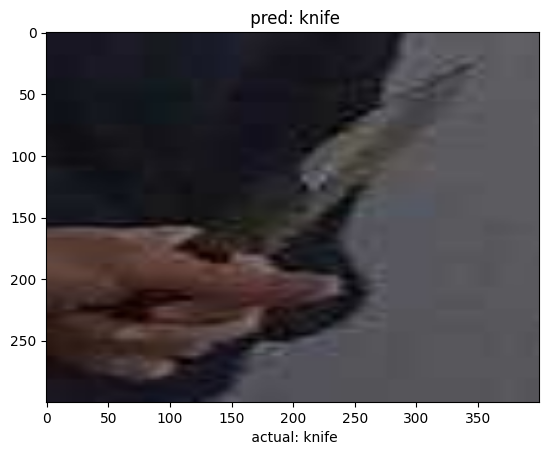

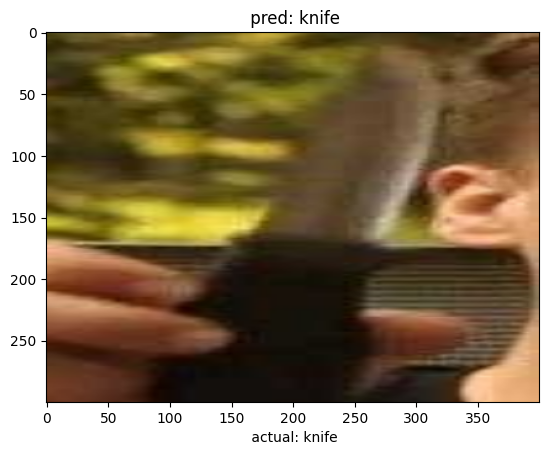

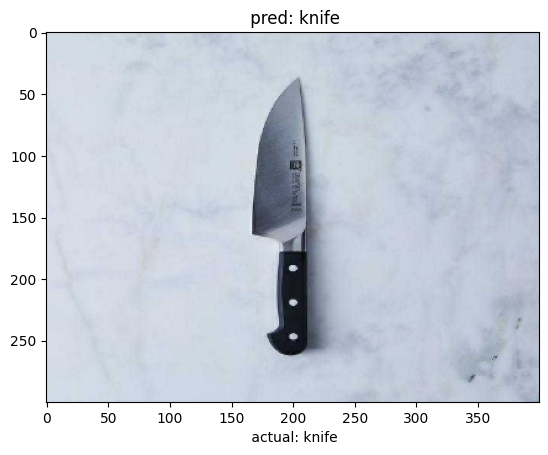

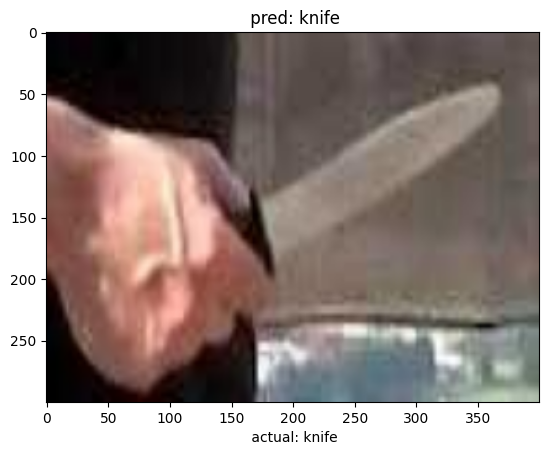

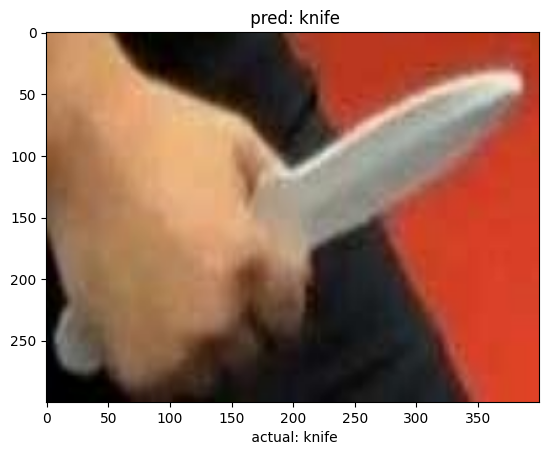

In [81]:
pred = model.predict(test_ds)

for images,labels in test_ds.take(1):
    for i in range(5):
        plt.figure()
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f' pred: {class_names[np.argmax(pred[i])]}')
        plt.xlabel(f' actual: {class_names[labels[i]]}')
        plt.show()

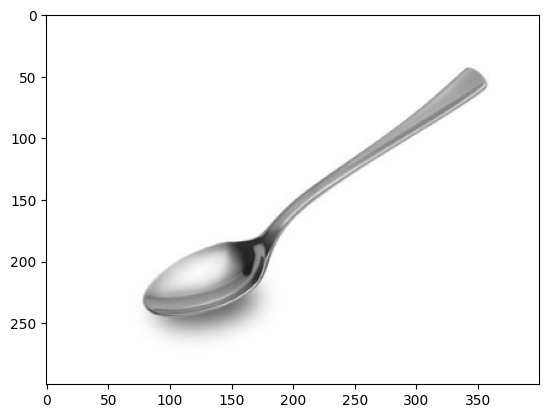

(1, 300, 400, 3)
1/1 [==============================] - 0s 39ms/step
knife


In [86]:
lyzka = cv2.imread('lyzka.jpg')
lyzka = cv2.resize(lyzka,(IMAGE_WIDTH,IMAGE_HEIGHT))
plt.imshow(lyzka)
plt.show()

lyzka = np.expand_dims(lyzka,axis=0)
print(lyzka.shape)
predict = model.predict(lyzka)

print(class_names[np.argmax(predict)])

# Save

In [10]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets
